In [62]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [154]:
m=300
n=40
h=2./m
t=np.zeros((m,1))
for i in range(m):
    t[i]=-1.-h/2.+(i+1)*h
    

In [155]:
initial = np.random.uniform(-1,1,n)
x0=initial
identity=np.eye(n)
zero=np.zeros((n,1))

In [156]:
def q(x):
    q_arr=np.zeros((m,1))
    for index in range(len(t)):
        prod=1.
        for x_ind in range(len(x)):
            prod=prod*(t[index]-x[x_ind])
        #print ('prod',prod, index)
        q_arr[index] = prod
    return q_arr


In [157]:
def J(x):
    J_arr=np.zeros((m,n))
    temp=q(x)
    for x_ind in range(len(x)):
        for index in range(len(t)):
            J_arr[index,x_ind]= -1*temp[index]/(t[index]-x[x_ind])
    return J_arr

In [158]:
for i in range(50):
    A=np.vstack((J(x0), np.sqrt(math.exp(-i))*identity))
    b=np.vstack((-q(x0),zero))
    x1=np.linalg.lstsq(A,b)[0]
    r=np.array(x0-x1.T)[0]
    #print (np.linalg.norm(r-x0))
    if(np.linalg.norm(r-x0)<10**-15):
        break
    x0=r

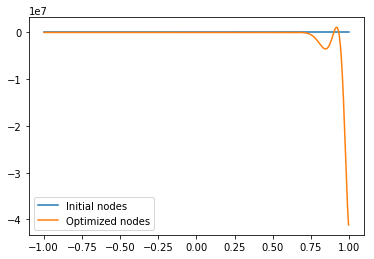

In [159]:
plt.plot(t,q(initial),label='Initial nodes')
plt.plot(t,q(x0), label='Optimized nodes')
plt.legend()
plt.show()
